# Introdução

Competição de [Kaggle Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/overview)

# Imports

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report 

In [201]:
# para o Pandas exibir sempre todas as colunas do DataFrame
pd.set_option('display.max_columns', None)

# Carga de Dataset

In [202]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [203]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [204]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [205]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [206]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Dicionário de dado

## Data Dictionary:

|Variable|Definition|Key
|---|---|---|
|survival|Survival|0 = No, 1 = Yes
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd
sex|Sex|	
Age|Age in years|	
sibsp|# of siblings / spouses aboard the Titanic	
parch|# of parents / children aboard the Titanic	
ticket|Ticket number	
fare|Passenger fare	
cabin|Cabin number	
embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton

## Variable Notes

**pclass:** A proxy for socio-economic status (SES)<br>
1st = Upper<br>
2nd = Middle<br>
3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...<br>
Sibling = brother, sister, stepbrother, stepsister<br>
Spouse = husband, wife (mistresses and fiancés were ignored)<br>
Obs.: Number of Siblings/Spouses aboard

**parch:** The dataset defines family relations in this way... <br>
Parent = mother, father<br>
Child = daughter, son, stepdaughter, stepson<br>
Some children travelled only with a nanny, therefore parch=0 for them.<br>
Obs.: Number of Parents/Children aboard

# Limpeza e Análise

In [207]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [208]:
qtde_sobreviventes = df_train["Survived"].value_counts()

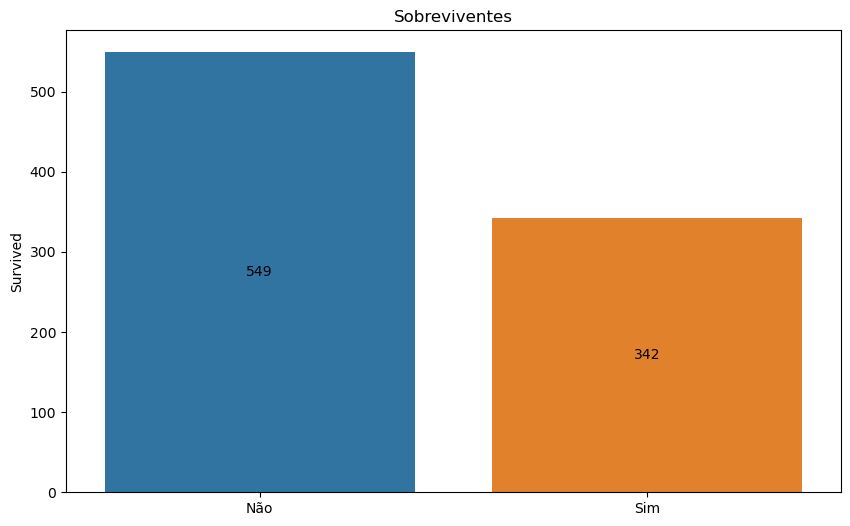

In [209]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Sobreviventes")
sns.barplot(x=qtde_sobreviventes.index.map({0:"Não", 1:"Sim"}), y=qtde_sobreviventes)
ax.bar_label(ax.containers[-1], fmt="%d", label_type="center")
plt.show()

In [210]:
def percent_null_values(df):
    return round(df.isnull().mean() * 100, 2)

In [211]:
# porcentagem de dados faltantes em cada coluna
percent_null_values(df_train)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [212]:
correlacao = df_train.corr()

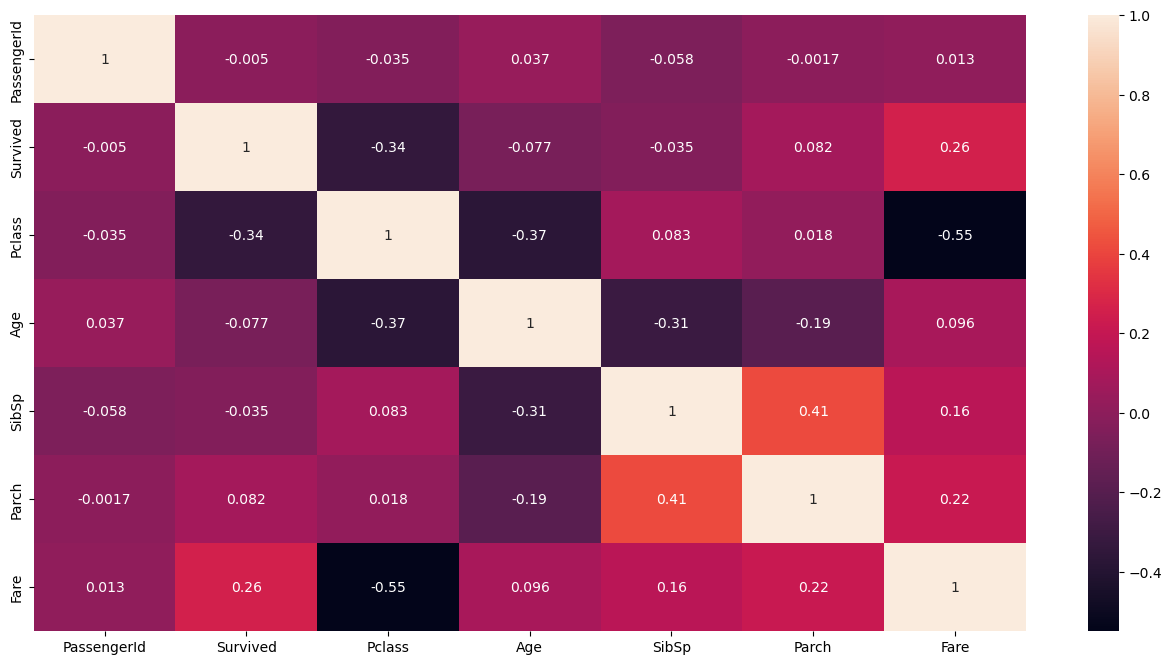

In [213]:
plt.figure(figsize=(16,8))
sns.heatmap(data=correlacao, annot=True)
plt.show()

**As maiores correlações (acima de 0.25 ou abaixo de -0.25) são as seguintes**
- Survived e Pclass (Correlação de -0.34)
    - Quando há um aumento da feature Pclass (ou seja, a classe da pessoa é menor), há uma tendência de menor chance dela ter sobrevivido.
- Survived e Fare (Correlação de 0.26)
    - Quanto maior a tarifa paga pela(o) passageira(o), maior a chance de ter sobrevivido.
- Pclass e Age (Correlação de -0.37)
    - A classe tem alguma relação com a idade. Quanto maior Pclass (ou seja, mais baixa a classe social), menor a idade.
- Pclass e Fare (Correlação de -0.55)
    - A classe também tem relação com a tarifa paga. Quanto menor Pclass (ou seja, maior a classe social), maior é a tarifa da passagem paga.
- Age e SibSp (Correlação de -0.31)
    - A idade está negativamente correlacionada à quantidade de irmãos e cônjuges na viagem.
- SibSp e Parch (Correlação de 0.41)
    - A quantidade de irmãos/cônjuge está positivamente correlacionada à quantidade de pais/filhos de alguém a bordo.

In [214]:
# estatísticas das features numéricas
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [215]:
# linhas que possuem todos os valores preenchidos
df_train.notnull().all(axis=1).sum()

183

In [216]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Criando coluna que identificará o título (pronome de tratamento por qual cada pessoas é tratada). Por padrão o pronome está sempre após a primeira vírgula, então, utilzando-se desse padrão é possível obtê-los.

In [218]:
# expressão regular que captura o padrão
df_train["Title"] = df_train.Name.str.extract(r',\s(\w+)')

In [219]:
# verificando a distribuição da idade dos passageiros
df_train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Observando o desvio padrão da idade ao agruparmos as pessoas por título

In [220]:
df_train.groupby(["Title"])["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
Capt,1.0,70.000000,NaN,70.00,70.000,70.0,70.00,70.0
Col,2.0,58.000000,2.828427,56.00,57.000,58.0,59.00,60.0
Don,1.0,40.000000,NaN,40.00,40.000,40.0,40.00,40.0
Dr,6.0,42.000000,12.016655,23.00,35.000,46.5,49.75,54.0
Jonkheer,1.0,38.000000,NaN,38.00,38.000,38.0,38.00,38.0
Lady,1.0,48.000000,NaN,48.00,48.000,48.0,48.00,48.0
Major,2.0,48.500000,4.949747,45.00,46.750,48.5,50.25,52.0
Master,36.0,4.574167,3.619872,0.42,1.000,3.5,8.00,12.0
Miss,146.0,21.773973,12.990292,0.75,14.125,21.0,30.00,63.0


In [221]:
# salvando a tabela acima para utilizar a média das idades por Títle como estimador das idades faltantes
Age_by_title = df_train.groupby(["Title"])["Age"].describe()

In [222]:
Age_by_title.index

Index(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',
       'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the'],
      dtype='object', name='Title')

Obtendo as médias das idades por Título e criando um dicionário que relaciona o Título à média das idades (parte inteira) das pessoas com aquele título 

In [223]:
aged = zip(Age_by_title.index, round(Age_by_title["mean"],0))

In [224]:
dicionario_subs = {k:v for k,v in aged}

In [225]:
dicionario_subs

{'Capt': 70.0,
 'Col': 58.0,
 'Don': 40.0,
 'Dr': 42.0,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.0,
 'Master': 5.0,
 'Miss': 22.0,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.0,
 'Mrs': 36.0,
 'Ms': 28.0,
 'Rev': 43.0,
 'Sir': 49.0,
 'the': 33.0}

In [226]:
# função para aplicar na coluna Age e substituir as idades ausentes pela média das idades das pessoas com aquele determinado título
def subs(row):
    if pd.isna(row["Age"]):
        return dicionario_subs[row["Title"]]
    else:
        return row["Age"]

In [227]:
# substituição dos valores asusentes em Age
df_train["Age"] = df_train.apply(subs,axis=1)

In [228]:
# porcentagem de dados faltantes em cada coluna
percent_null_values(df_train)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
Title           0.00
dtype: float64

Exluindo Cabin pois há muitos dados faltantes

In [229]:
df_train.drop(columns=["Cabin"], inplace=True)

Substituindo os valores ausentes de Embarked pelo mais comum

In [230]:
most_common_embarked = df_train.Embarked.value_counts().index[0]

In [231]:
df_train.Embarked.fillna(most_common_embarked, inplace=True)

Alterando Sex para binário

In [232]:
df_train.Sex.replace({"male":0, "female":1}, inplace=True)

Alterações no dataset de teste para ficar em conformidade com o dataset de treino

In [233]:
df_test["Title"] = df_test.Name.str.extract(r',\s(\w+)')
df_test.drop(columns=["Cabin"], inplace=True)
df_test.Sex.replace({"male":0, "female":1}, inplace=True)
df_test["Age"] = df_test.apply(subs,axis=1)

In [234]:
most_common_embarked = df_test.Embarked.value_counts().index[0]
df_test.Embarked.fillna(most_common_embarked, inplace=True)

In [235]:
df_test.Fare.fillna(value=df_test.Fare.mean(), inplace=True)

In [236]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


# Modelo

## Árvore de Decisão

In [237]:
clf = DecisionTreeClassifier()

In [238]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


Excluindo as features não numéricas e Fare por ter uma correlação alta com Pclass

In [239]:
# separando conjunto de treino
X_training = df_train.drop(columns=["Name", "Ticket", "Fare", "Title", "Embarked", "Survived"])
y_training = df_train.Survived

In [240]:
# treinamento do modelo
clf.fit(X=X_training, y=y_training)

DecisionTreeClassifier()

In [241]:
# separando conjunto de teste
X_testing = df_test.drop(columns=["Name", "Ticket", "Fare", "Title", "Embarked"])
y_testing = pd.read_csv("./data/gender_submission.csv")["Survived"]


In [243]:
# predição dos sobreviventes no conjunto de teste
predicted = clf.predict(X_testing)

In [244]:
print("Acurácia no conjunto de validação ou teste: {:.3f}".format(clf.score(X_testing, y_testing)))

Acurácia no conjunto de validação ou teste: 0.828


In [245]:
print(classification_report(y_testing, predicted))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       266
           1       0.82      0.68      0.74       152

    accuracy                           0.83       418
   macro avg       0.82      0.80      0.81       418
weighted avg       0.83      0.83      0.82       418

